In [2]:
# Import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from geopy.distance import geodesic

In [3]:
!aws s3 cp s3://team6datasets/Customer\ Segmentation.csv ./rawdatasets/

download: s3://team6datasets/Customer Segmentation.csv to rawdatasets/Customer Segmentation.csv


In [4]:
# Read the CSV file into a Pandas DataFrame
cust_seg_df = pd.read_csv("./rawdatasets/Customer Segmentation.csv", dtype=str)

cust_seg_df.head()

,first_name,last_name,title,gender,email,city,country,country_code,latitude,longitude,...,street_number,street_suffix,time_zone,company_name,department,job_title,language,university,linkedin_skill,ip_address
0,Priscella,Pollett,Honorable,Agender,ppollett0@foxnews.com,Sesheke,Zambia,ZM,-17.4738864,24.2955141,...,90004,Crossing,Africa/Lusaka,Omba,Support,Internal Auditor,Indonesian,University of Zambia,Lifestyle,129.60.144.253
1,Ana,Onge,Mr,Male,aonge1@fda.gov,Querecotillo,Peru,PE,-4.8383044,-80.6482153,...,9,Center,America/Lima,Cogidoo,Sales,Compensation Analyst,Fijian,Universidad Nacional de San Antonio Abad,Healthcare Industry,100.2.67.41
2,Butch,Rawls,Mrs,Male,brawls2@slideshare.net,Licupis,Peru,PE,-6.4240524,-79.242648,...,5104,Point,America/Lima,Edgewire,Support,Health Coach II,Gujarati,Universidad Nacional de San Martín,Visual SVN,48.161.197.47
3,Ambros,Fairrie,Rev,Male,afairrie3@reuters.com,Yonghe,China,CN,36.759507,110.632006,...,8,Center,Asia/Harbin,Digitube,Support,General Manager,Belarusian,Fuzhou University,Nanofabrication,36.188.226.116
4,Gaylene,Titcomb,Honorable,Female,gtitcomb4@dyndns.org,Wang Yang,Thailand,TH,17.0740883,104.4490398,...,994,Trail,Asia/Bangkok,Quaxo,Engineering,Internal Auditor,Papiamento,Mahachulalongkorn Buddhist University,AQL,181.24.84.57


## Begin cleaning and handling missing data

In [5]:
cust_seg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   first_name      51000 non-null  object
 1   last_name       51000 non-null  object
 2   title           51000 non-null  object
 3   gender          51000 non-null  object
 4   email           51000 non-null  object
 5   city            51000 non-null  object
 6   country         51000 non-null  object
 7   country_code    50966 non-null  object
 8   latitude        51000 non-null  object
 9   longitude       51000 non-null  object
 10  phone           51000 non-null  object
 11  street_address  51000 non-null  object
 12  street_name     51000 non-null  object
 13  street_number   51000 non-null  object
 14  street_suffix   51000 non-null  object
 15  time_zone       51000 non-null  object
 16  company_name    51000 non-null  object
 17  department      51000 non-null  object
 18  job_ti

In [6]:
cust_seg_df.shape

(51000, 23)

In [7]:
# check to see if we still have missing values
missing_values = cust_seg_df.isnull().sum()
missing_values

first_name         0
last_name          0
title              0
gender             0
email              0
city               0
country            0
country_code      34
latitude           0
longitude          0
phone              0
street_address     0
street_name        0
street_number      0
street_suffix      0
time_zone          0
company_name       0
department         0
job_title          0
language           0
university         0
linkedin_skill     0
ip_address         0
dtype: int64

In [8]:
# Explore specific rows with missing values
rows_with_missing_country_code = cust_seg_df.loc[cust_seg_df['country_code'].isnull()]

# Display results
print(rows_with_missing_country_code)

      first_name     last_name      title       gender  \
2883      Ermina         Nason         Mr         Male   
4567     Skipper         Coper         Mr       Female   
5279      Shaine     Vallentin         Ms         Male   
6625    Whitaker        Alldre         Dr       Female   
6790      Howard        Urlich         Mr       Female   
6932       Tatum         Nacey  Honorable       Female   
8217        Rosa         Nesby         Dr         Male   
8228       Ranee   Adamczewski  Honorable       Female   
8668       Rosie         Arber        Mrs         Male   
10498    Kendell       Blackey        Mrs       Female   
12831     Ursula       Lamburn        Mrs     Bigender   
13725    Joannes      Tweedell        Rev         Male   
15150    Aurthur       Snaddin         Mr         Male   
17710       Gary       Kaygill         Mr         Male   
20354     Darcey     Ellershaw         Mr         Male   
22369       Kori        Oxtoby         Dr       Female   
22882      Jes

In [9]:
# Fill missing country code for Namibia 'NA'
cust_seg_df['country_code'] = cust_seg_df['country_code'].fillna('NA')

# check to see if we still have missing values
missing_values_2 = cust_seg_df.isnull().sum()
missing_values_2

first_name        0
last_name         0
title             0
gender            0
email             0
city              0
country           0
country_code      0
latitude          0
longitude         0
phone             0
street_address    0
street_name       0
street_number     0
street_suffix     0
time_zone         0
company_name      0
department        0
job_title         0
language          0
university        0
linkedin_skill    0
ip_address        0
dtype: int64

In [10]:
# Trim excess whitespace in all columns
cust_seg_df = cust_seg_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [11]:
# Get distinct count of values in each column
distinct_counts = cust_seg_df.nunique()

# Print distinct counts
print("Distinct count of values in each column:")
print(distinct_counts)

Distinct count of values in each column:
first_name         8416
last_name         31257
title                 6
gender                8
email             51000
city              24921
country             235
country_code        235
latitude          26324
longitude         25821
phone             50999
street_address    50463
street_name         500
street_number     15803
street_suffix        21
time_zone           330
company_name        383
department           12
job_title           195
language             97
university         6633
linkedin_skill     5976
ip_address        51000
dtype: int64


In [12]:
cust_seg_df.shape

(51000, 23)

## Feature engineering

In [13]:
# *** Create a 'region' column to categorize countries ***

# Group countries by region or continent (add a new column 'region' or 'continent')
country_to_region = {
    'Afghanistan': 'Asia',
    'Aland Islands': 'Europe',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'American Samoa': 'Oceania',
    'Andorra': 'Europe',
    'Angola': 'Africa',
    'Anguilla': 'North America',
    'Antigua and Barbuda': 'North America',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Aruba': 'North America',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahamas': 'North America',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Bermuda': 'North America',
    'Bhutan': 'Asia',
    'Bolivia': 'South America',
    'Bonaire, Saint Eustatius and Saba': 'North America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Cape Verde': 'Africa',
    'Cayman Islands': 'North America',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Chile': 'South America',
    'China': 'Asia',
    'Christmas Island': 'Oceania',
    'Cocos Islands': 'Oceania',
    'Colombia': 'South America',
    'Comoros': 'Africa',
    'Cook Islands': 'Oceania',
    'Costa Rica': 'Central America',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Curacao': 'North America',
    'Cyprus': 'Asia',
    'Czech Republic': 'Europe',
    'Democratic Republic of the Congo': 'Africa',
    'Denmark': 'Europe',
    'Djibouti': 'Africa',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'East Timor': 'Asia',
    'Ecuador': 'South America',
    'Egypt': 'Africa',
    'El Salvador': 'North America',
    'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Falkland Islands': 'South America',
    'Faroe Islands': 'Europe',
    'Fiji': 'Oceania',
    'Finland': 'Europe',
    'France': 'Europe',
    'French Guiana': 'South America',
    'French Polynesia': 'Oceania',
    'French Southern Territories': 'Africa',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Greenland': 'North America',
    'Grenada': 'North America',
    'Guadeloupe': 'North America',
    'Guam': 'Oceania',
    'Guatemala': 'North America',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Honduras': 'North America',
    'Hong Kong': 'Asia',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran': 'Asia',
    'Iraq': 'Asia',
    'Ireland': 'Europe',
    'Isle of Man': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Ivory Coast': 'Africa',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Jersey': 'Europe',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kiribati': 'Oceania',
    'Kosovo': 'Europe',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Laos': 'Asia',
    'Latvia': 'Europe',
    'Lebanon': 'Asia',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Macao': 'Asia',
    'Macedonia': 'Europe',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Marshall Islands': 'Oceania',
    'Martinique': 'North America',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mayotte': 'Africa',
    'Mexico': 'North America',
    'Micronesia': 'Oceania',
    'Moldova': 'Europe',
    'Monaco': 'Europe',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Montserrat': 'North America',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Myanmar': 'Asia',
    'Namibia': 'Africa',
    'Nauru': 'Oceania',
    'Nepal': 'Asia',
    'Netherlands': 'Europe',
    'New Caledonia': 'Oceania',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'Niue': 'Oceania',
    'Norfolk Island': 'Oceania',
    'North Korea': 'Asia',
    'Northern Mariana Islands': 'Oceania',
    'Norway': 'Europe',
    'Oman': 'Asia',
    'Pakistan': 'Asia',
    'Palau': 'Oceania',
    'Palestinian Territory': 'Asia',
    'Panama': 'North America',
    'Papua New Guinea': 'Oceania',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Pitcairn': 'Oceania',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Puerto Rico': 'North America',
    'Qatar': 'Asia',
    'Republic of the Congo': 'Africa',
    'Reunion': 'Africa',
    'Romania': 'Europe',
    'Russia': 'Europe',
    'Rwanda': 'Africa',
    'Saint Helena': 'Africa',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Martin': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Samoa': 'Oceania',
    'San Marino': 'Europe',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Sint Maarten': 'North America',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'South Korea': 'Asia',
    'South Sudan': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sudan': 'Africa',
    'Suriname': 'South America',
    'Svalbard and Jan Mayen': 'Europe',
    'Swaziland': 'Africa',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Syria': 'Asia',
    'Taiwan': 'Asia',
    'Tajikistan': 'Asia',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Togo': 'Africa',
    'Tonga': 'Oceania',
    'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa',
    'Turkey': 'Asia',
    'Turkmenistan': 'Asia',
    'Tuvalu': 'Oceania',
    'U.S. Virgin Islands': 'North America',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Vanuatu': 'Oceania',
    'Venezuela': 'South America',
    'Vietnam': 'Asia',
    'Wallis and Futuna': 'Oceania',
    'Western Sahara': 'Africa',
    'Yemen': 'Asia',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa'
}

# Map countries to their regions and assign to 'region' column
cust_seg_df['region'] = cust_seg_df['country'].map(country_to_region)

# Insert the 'region' column at position 8 after the 'country' column
cust_seg_df.insert(8, 'region', cust_seg_df.pop('region'))  


In [14]:
job_title_to_category = {
    'Account Coordinator': 'Administrative',
    'Account Executive': 'Sales',
    'Account Representative I': 'Sales',
    'Account Representative II': 'Sales',
    'Account Representative III': 'Sales',
    'Account Representative IV': 'Sales',
    'Accountant I': 'Finance',
    'Accountant II': 'Finance',
    'Accountant III': 'Finance',
    'Accountant IV': 'Finance',
    'Accounting Assistant I': 'Finance',
    'Accounting Assistant II': 'Finance',
    'Accounting Assistant III': 'Finance',
    'Accounting Assistant IV': 'Finance',
    'Actuary': 'Finance',
    'Administrative Assistant I': 'Administrative',
    'Administrative Assistant II': 'Administrative',
    'Administrative Assistant III': 'Administrative',
    'Administrative Assistant IV': 'Administrative',
    'Administrative Officer': 'Administrative',
    'Analog Circuit Design manager': 'Engineering',
    'Analyst Programmer': 'IT',
    'Assistant Manager': 'Management',
    'Assistant Media Planner': 'Media',
    'Assistant Professor': 'Education',
    'Associate Professor': 'Education',
    'Automation Specialist I': 'Engineering',
    'Automation Specialist II': 'Engineering',
    'Automation Specialist III': 'Engineering',
    'Automation Specialist IV': 'Engineering',
    'Biostatistician I': 'Science',
    'Biostatistician II': 'Science',
    'Biostatistician III': 'Science',
    'Biostatistician IV': 'Science',
    'Budget/Accounting Analyst I': 'Finance',
    'Budget/Accounting Analyst II': 'Finance',
    'Budget/Accounting Analyst III': 'Finance',
    'Budget/Accounting Analyst IV': 'Finance',
    'Business Systems Development Analyst': 'IT',
    'Chemical Engineer': 'Engineering',
    'Chief Design Engineer': 'Engineering',
    'Civil Engineer': 'Engineering',
    'Clinical Specialist': 'Medical',
    'Community Outreach Specialist': 'Social Services',
    'Compensation Analyst': 'Human Resources',
    'Computer Systems Analyst I': 'IT',
    'Computer Systems Analyst II': 'IT',
    'Computer Systems Analyst III': 'IT',
    'Computer Systems Analyst IV': 'IT',
    'Cost Accountant': 'Finance',
    'Data Coordiator': 'IT',
    'Database Administrator I': 'IT',
    'Database Administrator II': 'IT',
    'Database Administrator III': 'IT',
    'Database Administrator IV': 'IT',
    'Dental Hygienist': 'Medical',
    'Design Engineer': 'Engineering',
    'Desktop Support Technician': 'IT',
    'Developer I': 'IT',
    'Developer II': 'IT',
    'Developer III': 'IT',
    'Developer IV': 'IT',
    'Director of Sales': 'Sales',
    'Editor': 'Media',
    'Electrical Engineer': 'Engineering',
    'Engineer I': 'Engineering',
    'Engineer II': 'Engineering',
    'Engineer III': 'Engineering',
    'Engineer IV': 'Engineering',
    'Environmental Specialist': 'Environmental',
    'Environmental Tech': 'Environmental',
    'Executive Secretary': 'Administrative',
    'Financial Advisor': 'Finance',
    'Financial Analyst': 'Finance',
    'Food Chemist': 'Science',
    'General Manager': 'Management',
    'Geological Engineer': 'Engineering',
    'Geologist I': 'Science',
    'Geologist II': 'Science',
    'Geologist III': 'Science',
    'Geologist IV': 'Science',
    'GIS Technical Architect': 'IT',
    'Graphic Designer': 'Design',
    'Health Coach I': 'Healthcare',
    'Health Coach II': 'Healthcare',
    'Health Coach III': 'Healthcare',
    'Health Coach IV': 'Healthcare',
    'Help Desk Operator': 'IT',
    'Help Desk Technician': 'IT',
    'Human Resources Assistant I': 'Human Resources',
    'Human Resources Assistant II': 'Human Resources',
    'Human Resources Assistant III': 'Human Resources',
    'Human Resources Assistant IV': 'Human Resources',
    'Human Resources Manager': 'Human Resources',
    'Information Systems Manager': 'IT',
    'Internal Auditor': 'Finance',
    'Junior Executive': 'Management',
    'Legal Assistant': 'Legal',
    'Librarian': 'Education',
    'Marketing Assistant': 'Marketing',
    'Marketing Manager': 'Marketing',
    'Mechanical Systems Engineer': 'Engineering',
    'Media Manager I': 'Media',
    'Media Manager II': 'Media',
    'Media Manager III': 'Media',
    'Media Manager IV': 'Media',
    'Nuclear Power Engineer': 'Engineering',
    'Nurse': 'Medical',
    'Nurse Practitioner': 'Medical',
    'Occupational Therapist': 'Medical',
    'Office Assistant I': 'Administrative',
    'Office Assistant II': 'Administrative',
    'Office Assistant III': 'Administrative',
    'Office Assistant IV': 'Administrative',
    'Operator': 'Manufacturing',
    'Paralegal': 'Legal',
    'Payment Adjustment Coordinator': 'Healthcare',
    'Pharmacist': 'Medical',
    'Physical Therapy Assistant': 'Medical',
    'Product Engineer': 'Engineering',
    'Professor': 'Education',
    'Programmer Analyst I': 'IT',
    'Programmer Analyst II': 'IT',
    'Programmer Analyst III': 'IT',
    'Programmer Analyst IV': 'IT',
    'Programmer I': 'IT',
    'Programmer II': 'IT',
    'Programmer III': 'IT',
    'Programmer IV': 'IT',
    'Project Manager': 'Management',
    'Quality Control Specialist': 'Quality Assurance',
    'Quality Engineer': 'Engineering',
    'Recruiter': 'Human Resources',
    'Recruiting Manager': 'Human Resources',
    'Registered Nurse': 'Medical',
    'Research Assistant I': 'Research',
    'Research Assistant II': 'Research',
    'Research Assistant III': 'Research',
    'Research Assistant IV': 'Research',
    'Research Associate': 'Research',
    'Research Nurse': 'Medical',
    'Safety Technician I': 'Safety',
    'Safety Technician II': 'Safety',
    'Safety Technician III': 'Safety',
    'Safety Technician IV': 'Safety',
    'Sales Associate': 'Sales',
    'Sales Representative': 'Sales',
    'Senior Cost Accountant': 'Finance',
    'Senior Developer': 'IT',
    'Senior Editor': 'Media',
    'Senior Financial Analyst': 'Finance',
    'Senior Quality Engineer': 'Engineering',
    'Senior Sales Associate': 'Sales',
    'Social Worker': 'Social Services',
    'Software Consultant': 'IT',
    'Software Engineer I': 'IT',
    'Software Engineer II': 'IT',
    'Software Engineer III': 'IT',
    'Software Engineer IV': 'IT',
    'Software Test Engineer I': 'IT',
    'Software Test Engineer II': 'IT',
    'Software Test Engineer III': 'IT',
    'Software Test Engineer IV': 'IT',
    'Speech Pathologist': 'Medical',
    'Staff Accountant I': 'Finance',
    'Staff Accountant II': 'Finance',
    'Staff Accountant III': 'Finance',
    'Staff Accountant IV': 'Finance',
    'Staff Scientist': 'Science',
    'Statistician I': 'Science',
    'Statistician II': 'Science',
    'Statistician III': 'Science',
    'Statistician IV': 'Science',
    'Structural Analysis Engineer': 'Engineering',
    'Structural Engineer': 'Engineering',
    'Systems Administrator I': 'IT',
    'Systems Administrator II': 'IT',
    'Systems Administrator III': 'IT',
    'Systems Administrator IV': 'IT',
    'Tax Accountant': 'Finance',
    'Teacher': 'Education',
    'Technical Writer': 'IT',
    'VP Accounting': 'Finance',
    'VP Marketing': 'Marketing',
    'VP Product Management': 'Product Management',
    'VP Quality Control': 'Quality Assurance',
    'VP Sales': 'Sales',
    'Web Designer I': 'Design',
    'Web Designer II': 'Design',
    'Web Designer III': 'Design',
    'Web Designer IV': 'Design',
    'Web Developer I': 'IT',
    'Web Developer II': 'IT',
    'Web Developer III': 'IT',
    'Web Developer IV': 'IT'
}

# Map job titles to their categories and assign to 'job_category' column
cust_seg_df['job_category'] = cust_seg_df['job_title'].map(job_title_to_category)

# Insert the 'job_category' column at position 20 after the 'job_title' column
cust_seg_df.insert(20, 'job_category', cust_seg_df.pop('job_category')) 

In [15]:
cust_seg_df.columns

Index(['first_name', 'last_name', 'title', 'gender', 'email', 'city',
       'country', 'country_code', 'region', 'latitude', 'longitude', 'phone',
       'street_address', 'street_name', 'street_number', 'street_suffix',
       'time_zone', 'company_name', 'department', 'job_title', 'job_category',
       'language', 'university', 'linkedin_skill', 'ip_address'],
      dtype='object')

## Begin Data Exploration

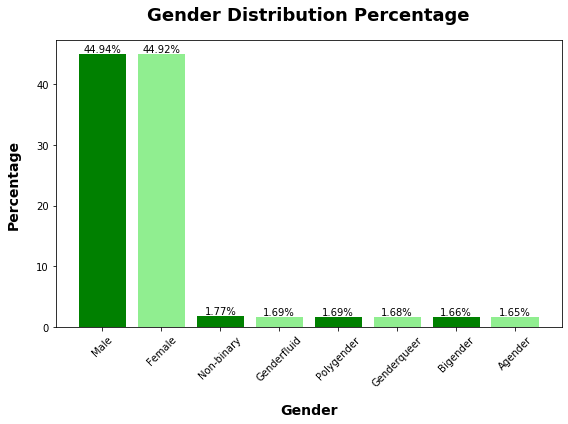

In [16]:
# Gender Distribution Analysis
gender_distribution = cust_seg_df['gender'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))

# Define colors for the bars
colors = ['green', 'lightgreen']  # You can specify colors according to your preference

# Plot the bar chart with specified colors
bars = plt.bar(x=gender_distribution.index, height=gender_distribution.values, color=colors)

plt.title('Gender Distribution Percentage', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Gender', fontsize=14, fontweight='bold', labelpad=15)
plt.ylabel('Percentage', fontsize=14, fontweight='bold', labelpad=15)

# Rotate x-labels
plt.xticks(rotation=45)

# Add percentages to each bar
for bar, value in zip(bars, gender_distribution.values):
    formatted_value = '{:.2f}%'.format(value)  # Format the percentage with two decimal places
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), formatted_value,
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


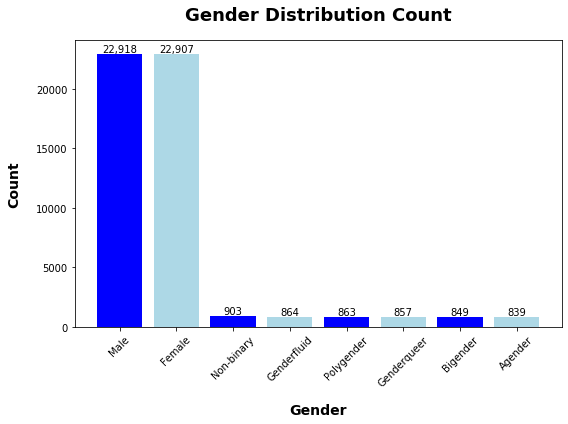

In [17]:
# Gender Distribution Analysis
gender_distribution = cust_seg_df['gender'].value_counts()

plt.figure(figsize=(8, 6))

# Define colors for the bars
colors = ['blue', 'lightblue']  # You can specify colors according to your preference

bars = plt.bar(x=gender_distribution.index, height=gender_distribution.values, color=colors)

plt.title('Gender Distribution Count', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Gender', fontsize=14, fontweight='bold', labelpad=15)
plt.ylabel('Count', fontsize=14, fontweight='bold', labelpad=15)

# Rotate x-labels
plt.xticks(rotation=45)

# Add numbers to each bar
for bar, value in zip(bars, gender_distribution.values):
    formatted_value = '{:,.0f}'.format(value)  # Add commas to the number
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), formatted_value,
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


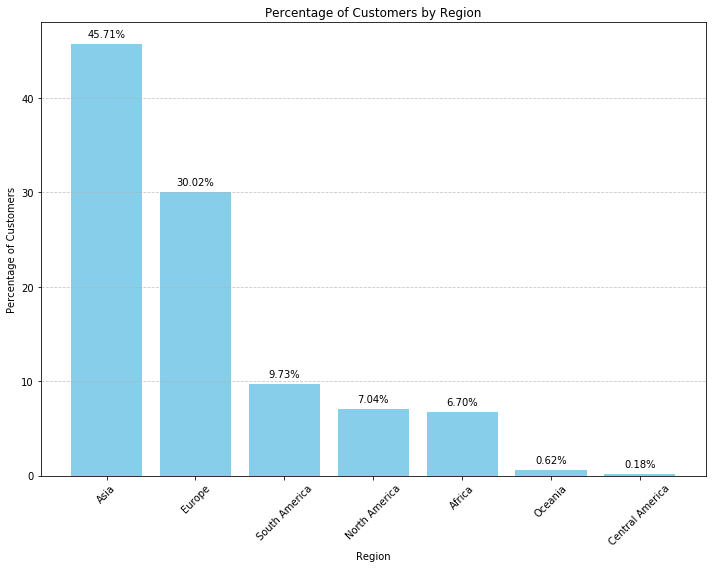

In [18]:
# Calculate the percentage of customers in each region
region_percentage = cust_seg_df['region'].value_counts(normalize=True) * 100

# Plotting the data
plt.figure(figsize=(10, 8))
ax = plt.bar(x=region_percentage.index, height=region_percentage.values, color='skyblue')
plt.title('Percentage of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding percentages to each bar
for bar, value in zip(ax, region_percentage.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, \
             f'{value:.2f}%', fontsize=10, ha='center', va='bottom')

plt.tight_layout()
plt.show()


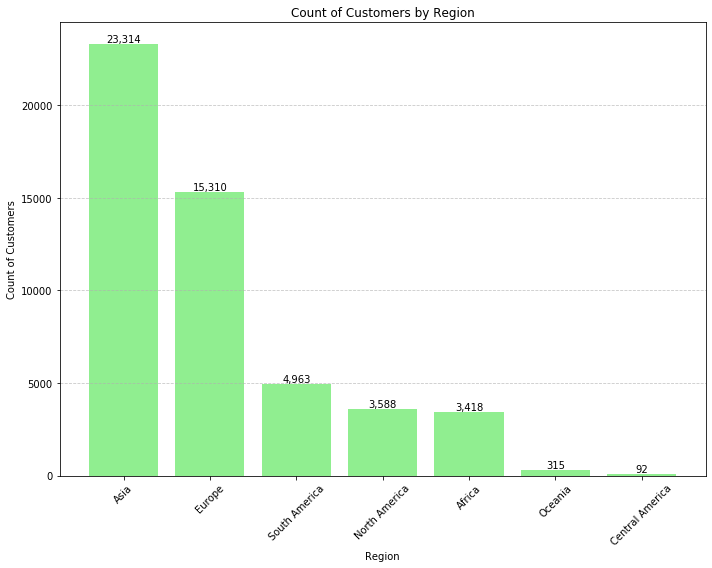

In [19]:
# Calculate the count of customers in each region
region_count = cust_seg_df['region'].value_counts()

# Plotting the data
plt.figure(figsize=(10, 8))
ax = plt.bar(x=region_count.index, height=region_count.values, color='lightgreen')
plt.title('Count of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding counts to each bar
for bar, count in zip(ax, region_count.values):
    formatted_count = "{:,}".format(count)  # Format the count with commas
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, formatted_count, fontsize=10, ha='center', va='bottom')

plt.tight_layout()
plt.show()


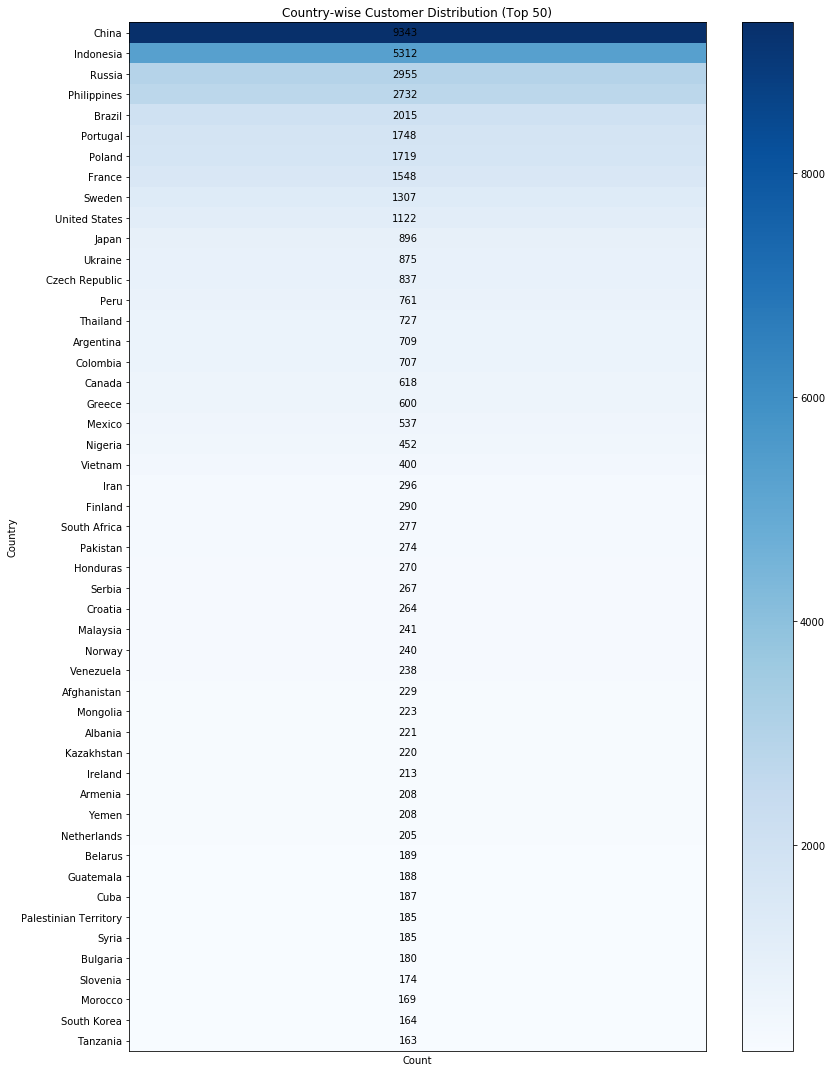

In [20]:
# Calculate country-wise customer distribution
country_distribution = cust_seg_df['country'].value_counts()

# Filter top N countries 
top_n_countries = country_distribution.nlargest(50)

# Create a DataFrame with country counts
country_counts_df = pd.DataFrame({'Country': top_n_countries.index, 'Count': top_n_countries.values})

# Plot horizontal heatmap 
plt.figure(figsize=(12, 15))  

# Create heatmap without using seaborn
heatmap = plt.imshow(country_counts_df['Count'].values.reshape(-1, 1), cmap='Blues', aspect='auto')
plt.yticks(ticks=np.arange(len(country_counts_df)), labels=country_counts_df['Country'])
plt.xticks([])
plt.title('Country-wise Customer Distribution (Top 50)')
plt.ylabel('Country')
plt.xlabel('Count')

# Add annotations with rotated text
for i in range(len(country_counts_df)):
    plt.text(0, i, str(country_counts_df['Count'].iloc[i]), ha='right', va='center', color='black')

plt.colorbar(heatmap)
plt.tight_layout()
plt.show()


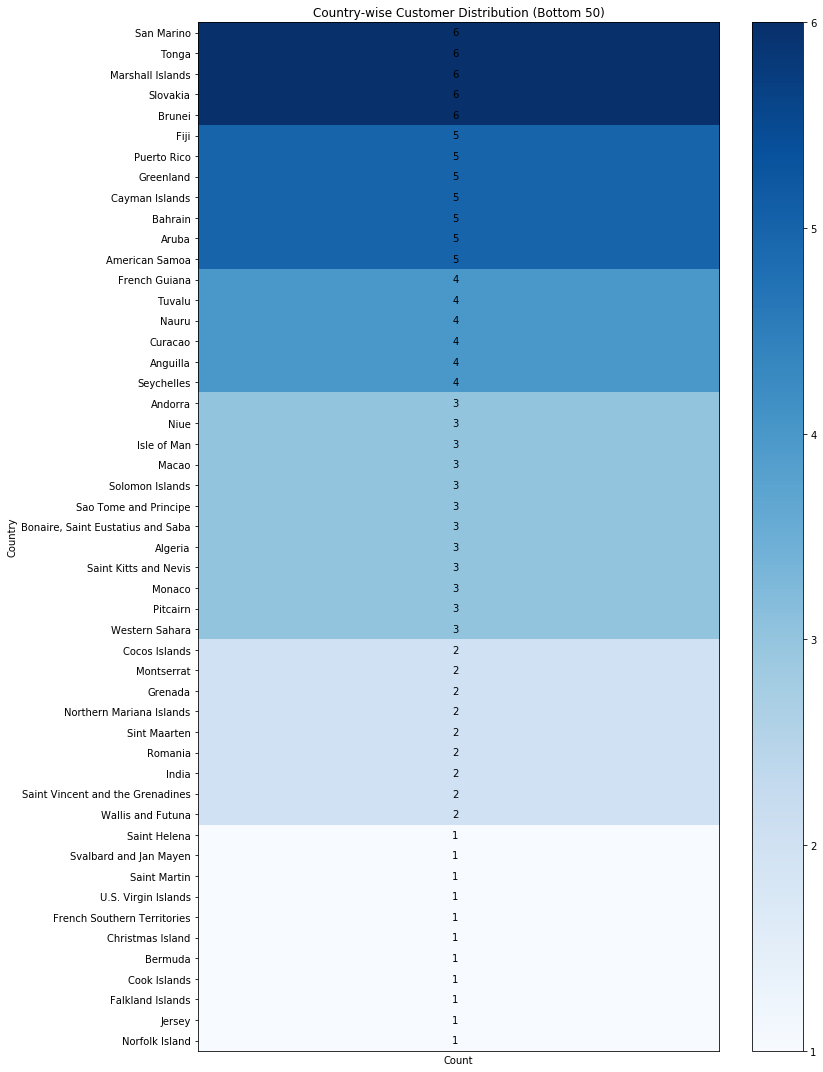

In [21]:
# Calculate country-wise customer distribution
country_distribution = cust_seg_df['country'].value_counts()

# Filter top N countries 
top_n_countries = country_distribution.nsmallest(50)

# Create a DataFrame with country counts and reverse the order
country_counts_df = pd.DataFrame({'Country': top_n_countries.index, 'Count': top_n_countries.values})[::-1]

# Plot horizontal heatmap 
plt.figure(figsize=(12, 15))  

# Create heatmap without using seaborn
heatmap = plt.imshow(country_counts_df['Count'].values.reshape(-1, 1), cmap='Blues', aspect='auto')
plt.yticks(ticks=np.arange(len(country_counts_df)), labels=country_counts_df['Country'])
plt.xticks([])
plt.title('Country-wise Customer Distribution (Bottom 50)')
plt.ylabel('Country')
plt.xlabel('Count')

# Add annotations with rotated text
for i in range(len(country_counts_df)):
    plt.text(0, i, str(country_counts_df['Count'].iloc[i]), ha='right', va='center', color='black')

plt.colorbar(heatmap)
plt.tight_layout()
plt.show()


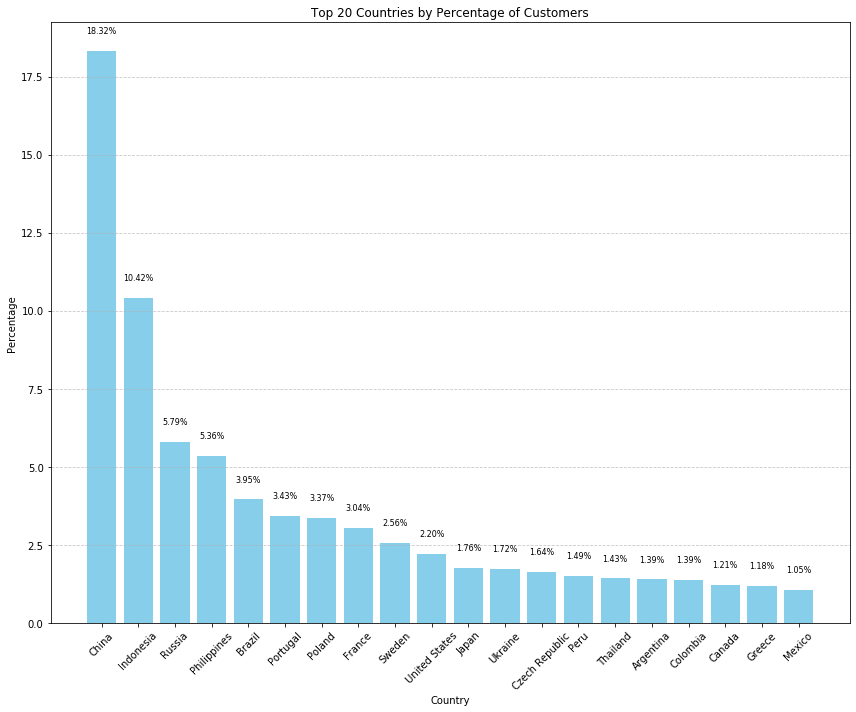

In [22]:
# Calculate country-wise customer distribution
country_distribution = cust_seg_df['country'].value_counts()

# Calculate percentage of customers for each country
percentage_distribution = (country_distribution / len(cust_seg_df)) * 100

# Select top 20 countries
top_20_countries = percentage_distribution.nlargest(20)

# Plot top 20 countries
plt.figure(figsize=(12, 10))
bars = plt.bar(x=top_20_countries.index, height=top_20_countries.values, color='skyblue')
plt.title('Top 20 Countries by Percentage of Customers')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its percentage
for bar, percentage in zip(bars, top_20_countries):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


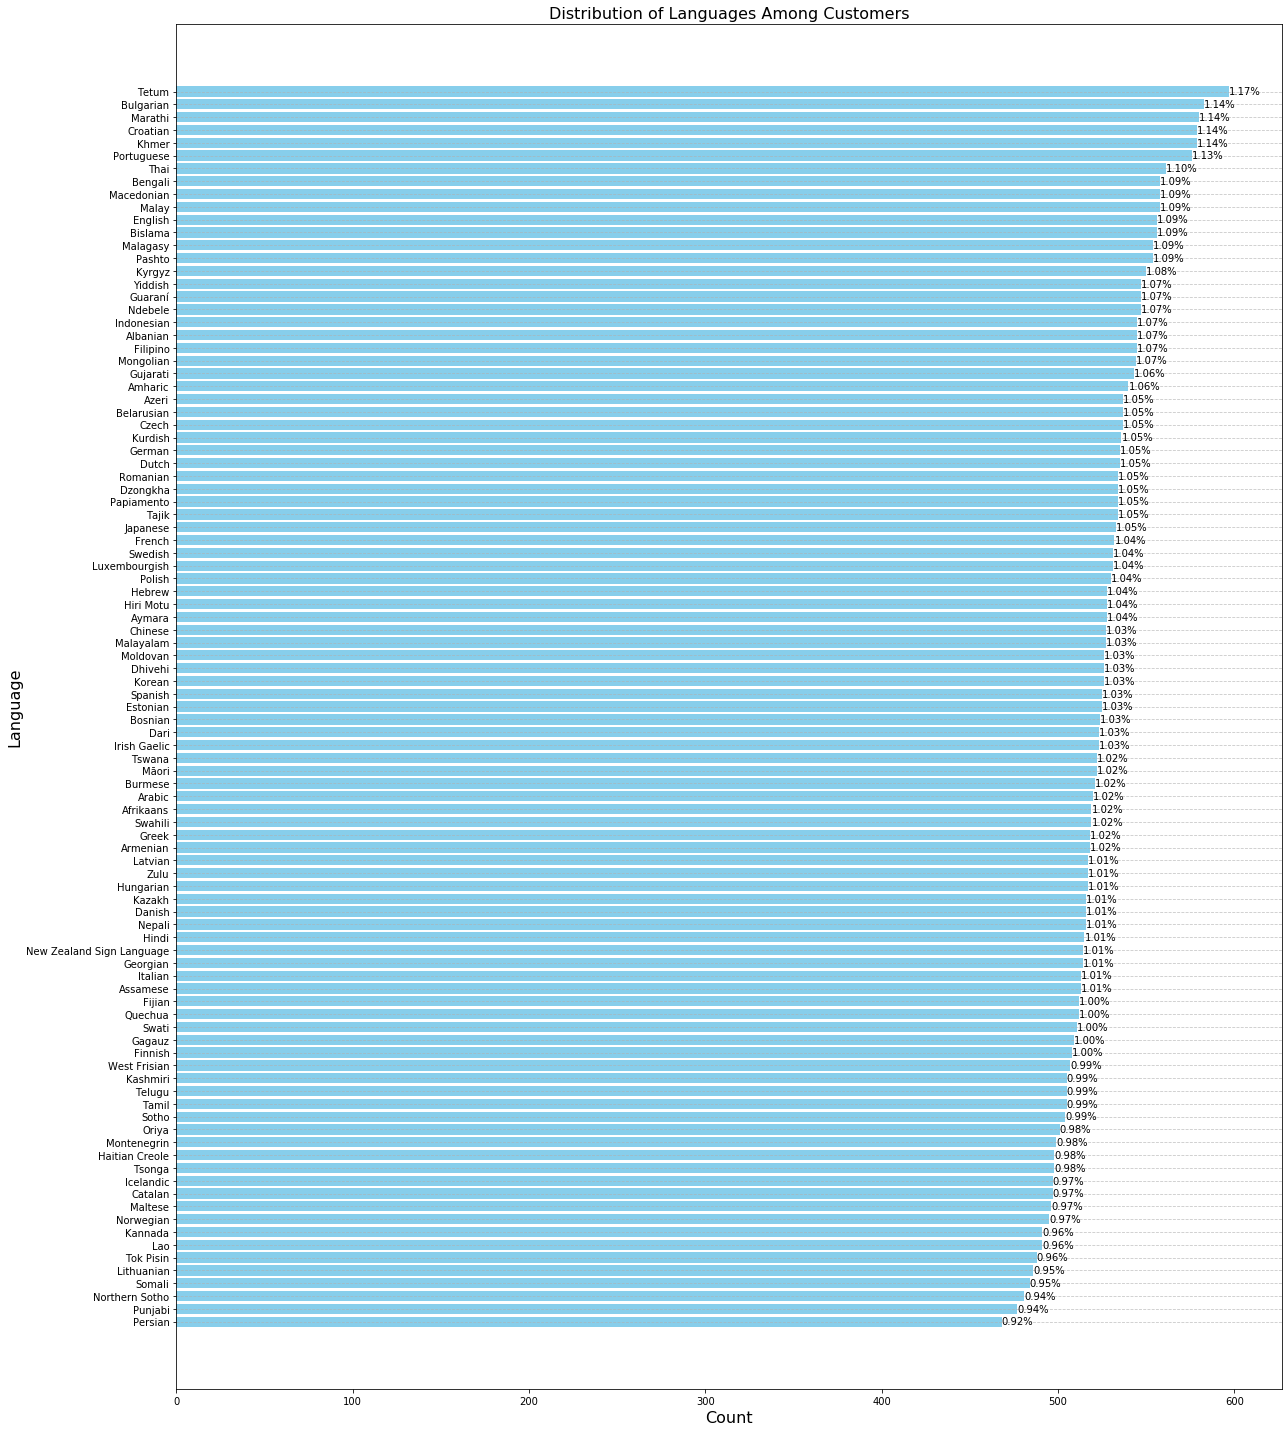

In [23]:
# Language Analysis
language_distribution = cust_seg_df['language'].value_counts()
plt.figure(figsize=(18, 20))

# Reverse the order
language_distribution = language_distribution[::-1]

# Plotting the bar chart
bars = plt.barh(y=language_distribution.index[:97], width=language_distribution.values[:97], color='skyblue')
plt.title('Distribution of Languages Among Customers', fontsize=16)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Language', fontsize=16)
plt.xticks(rotation=0)  # Adjust rotation for x-axis ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentages to each bar
total = float(len(cust_seg_df['language']))
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2., f'{(width / total * 100):.2f}%',
             ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()


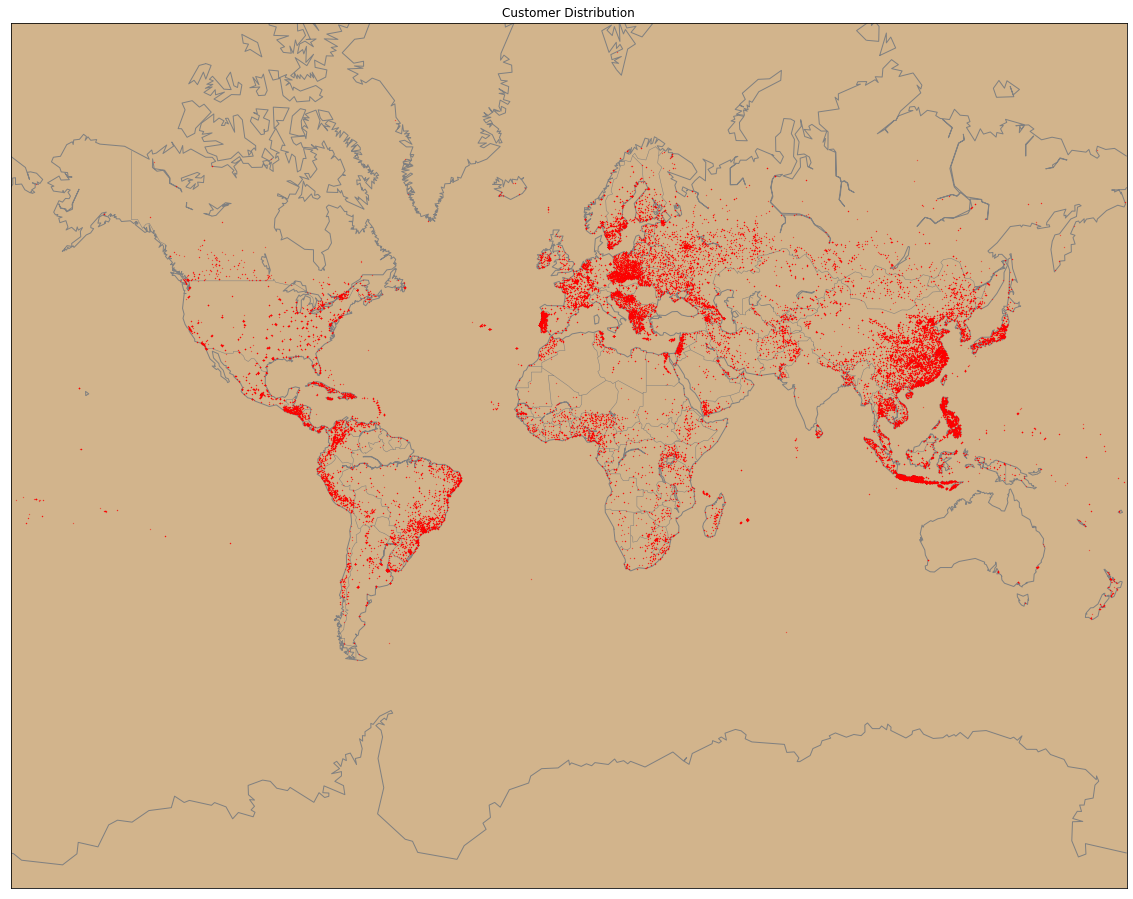

In [24]:
# Convert latitude and longitude columns to float type
cust_seg_df['latitude'] = cust_seg_df['latitude'].astype(float)
cust_seg_df['longitude'] = cust_seg_df['longitude'].astype(float)

# Create a Basemap instance
plt.figure(figsize=(20, 18))
plt.gca().set_facecolor('tan') 
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, 
            lat_ts=20, resolution='c')

# Plot the map
m.drawcoastlines(color='grey')
m.drawcountries(color='grey')

# Extract latitude and longitude from your dataset
lats = cust_seg_df['latitude'].values
lons = cust_seg_df['longitude'].values

# Plot customer locations
x, y = m(lons, lats)
m.scatter(x, y, marker='o', color='red', s=0.05, zorder=5)

plt.title('Customer Distribution')
plt.show()


temporarily commenting out since we already have one map (this one uses cartopy and we were having installation issues)

In [25]:
# # Create a figure and axis with Cartopy projection
# plt.figure(figsize=(12, 10))
# ax = plt.axes(projection=ccrs.PlateCarree())

# # Plot customer locations
# ax.scatter(cust_seg_df['longitude'], cust_seg_df['latitude'], marker='o', color='red', s=0.05, transform=ccrs.PlateCarree())

# # Set the map to global extent
# ax.set_global()

# # Add stock image and coastlines
# ax.stock_img()
# ax.coastlines()

# plt.title('Customer Distribution')
# plt.show()

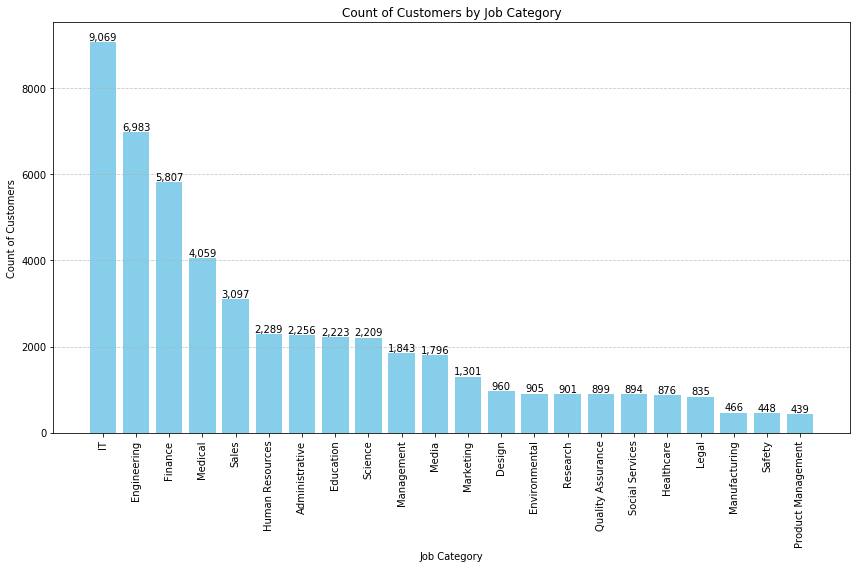

In [26]:
# Calculate the count of customers in each job category
job_category_count = cust_seg_df['job_category'].value_counts()

# Plotting the data
plt.figure(figsize=(12, 8))
bars = plt.bar(x=job_category_count.index, height=job_category_count.values, color='skyblue')

# Adding counts to each bar
for bar, count in zip(bars, job_category_count.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, 
             str("{:,}".format(int(count))), fontsize=10, ha='center', va='bottom')

plt.title('Count of Customers by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Count of Customers')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
